# 1. Clustering: Segmentación de Clientes

### 1.1. Selección del Dataset y Metodología
Para cumplir con el objetivo de **identificar grupos homogéneos de clientes** y caracterizarlos según su valor para la empresa, se seleccionó el conjunto de datos estandarizado **"Mall Customers"**.

Este dataset es ideal para el ejercicio ya que contiene las variables críticas de comportamiento transaccional necesarias para una segmentación accionable:
* **Ingreso Anual (Annual Income):** Capacidad económica del cliente.
* **Puntaje de Gasto (Spending Score):** Comportamiento de compra asignado por la tienda (1-100).

**Algoritmo utilizado:** K-Means Clustering.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 1. Carga del Dataset Correcto
# Usamos el repositorio de SharmaRoshan que es estable
url = "https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv"
df = pd.read_csv(url)

# 2. Limpieza y Renombre de Columnas
# Normalizamos los nombres al español para el informe
df.rename(columns={
    'CustomerID': 'ID',
    'Genre': 'Genero', 'Gender': 'Genero', # Corrige ambas variantes
    'Age': 'Edad',
    'Annual Income (k$)': 'Ingreso_Anual',
    'Spending Score (1-100)': 'Puntaje_Gasto'
}, inplace=True)

# Seleccionamos las variables para el clustering (Ingreso vs Gasto)
X = df[['Ingreso_Anual', 'Puntaje_Gasto']].values

# Mostramos las primeras filas para verificar
print("✅ Datos cargados correctamente:")
df.head()

✅ Datos cargados correctamente:


,ID,Genero,Edad,Ingreso_Anual,Puntaje_Gasto
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 1.2. Determinación del Número Óptimo de Clusters
Para definir en cuántos grupos dividir a los clientes, utilizamos el **Método del Codo (Elbow Method)**, calculando la inercia (WCSS) para diferentes valores de $K$.

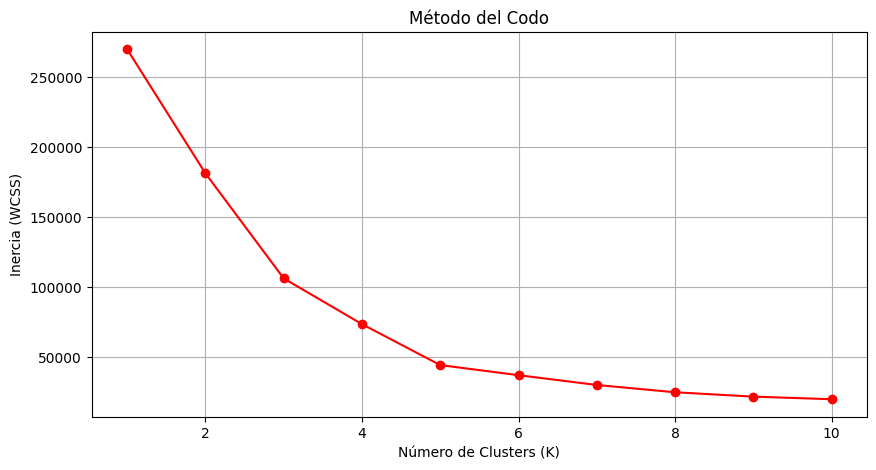

In [6]:
# Cálculo de la inercia para K de 1 a 10
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Gráfica del Método del Codo
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', color='red')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia (WCSS)')
plt.grid(True)
plt.show()

**Análisis:**
Como se observa en la gráfica anterior, la curva presenta un quiebre pronunciado (codo) en **$K=5$**. 

Esto indica que 5 es el número óptimo de clusters para segmentar a estos clientes sin sobreajustar el modelo. Procedemos a entrenar el algoritmo con este valor.

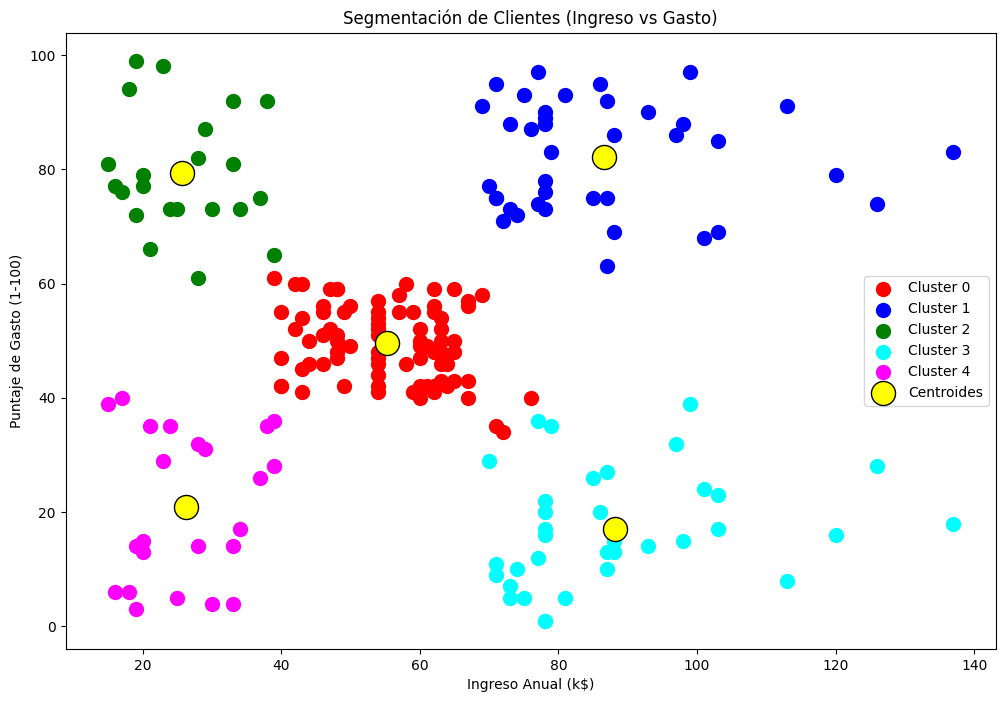

In [7]:
# 1. Entrenamiento del Modelo K-Means con K=5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# Asignamos el cluster a cada cliente en el DataFrame
df['Cluster'] = y_kmeans

# 2. Visualización de los Segmentos
plt.figure(figsize=(12,8))

# Colores para cada grupo
colores = ['red', 'blue', 'green', 'cyan', 'magenta']
etiquetas = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

for i in range(5):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], 
                s=100, c=colores[i], label=etiquetas[i])

# Graficar Centroides
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='yellow', label='Centroides', edgecolors='black')

plt.title('Segmentación de Clientes (Ingreso vs Gasto)')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.legend()
plt.show()

### 1.3. Caracterización y Estrategia Comercial (Action Plan)

Tras el análisis visual, se han identificado 5 perfiles claros. Se proponen las siguientes acciones para cada uno:

| Color (Ref) | Perfil del Cliente | Características | Estrategia Propuesta |
| :--- | :--- | :--- | :--- |
| **Verde** | **VIP / Objetivo** | Altos Ingresos y Alto Gasto. | **Fidelización:** Crear un "Club VIP". No ofrecer descuentos, sino exclusividad y trato preferencial. |
| **Rojo** | **Ahorradores / Cautos** | Altos Ingresos y Bajo Gasto. | **Conversión Racional:** Ofrecer productos de alta calidad técnica o garantías extendidas para justificar su inversión. |
| **Cyan** | **Derrochadores** | Bajos Ingresos y Alto Gasto. | **Venta Impulsiva:** Enviar ofertas "Flash" de tiempo limitado y cupones visualmente atractivos. |
| **Azul** | **Promedio** | Ingresos Medios y Gasto Medio. | **Upselling:** Promociones tipo "Lleva 2 y paga 1" para aumentar su ticket promedio. |
| **Magenta** | **Bajo Perfil** | Bajos Ingresos y Bajo Gasto. | **Mantenimiento:** Comunicación básica automatizada (newsletter) para no invertir recursos excesivos. |